In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [4]:
np.random.seed(42)

# Step 1: Generate synthetic height data
# Group A: shorter population (e.g., avg. 160 cm, std 5)
# Group B: taller population (e.g., avg. 175 cm, std 6)
group_a = np.random.normal(loc=160, scale=5, size=300)
group_b = np.random.normal(loc=175, scale=6, size=300)

In [5]:
# Combine and shuffle the data to redunce overfitting using unbiased training 
data = np.hstack((group_a, group_b))
np.random.shuffle(data)

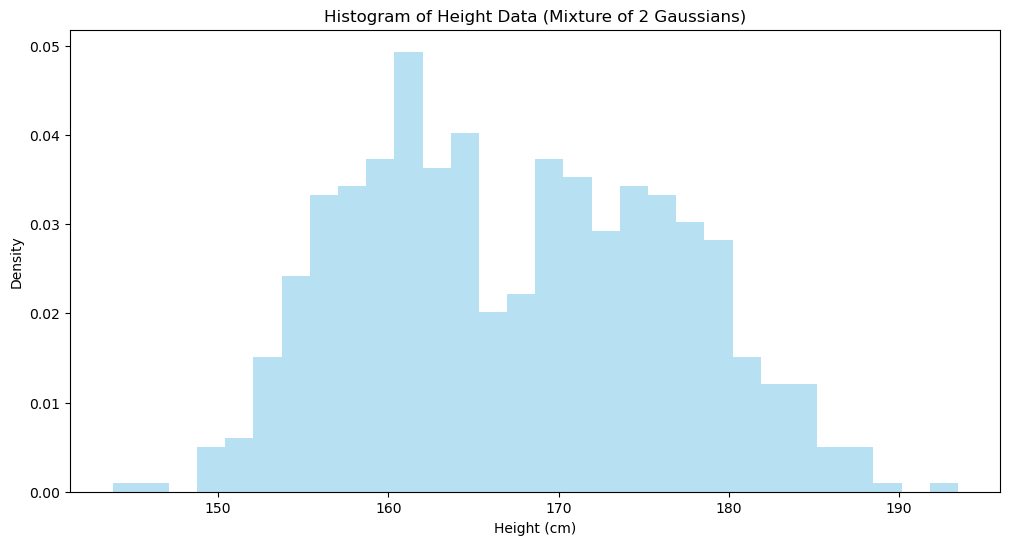

In [6]:
# Assuming 'data' is your height data
plt.figure(figsize=(12, 6))  # Set the figure size
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue')
plt.title("Histogram of Height Data (Mixture of 2 Gaussians)")
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.show()

In [9]:
# Step 3: EM algorithm
def initialize_params():
    # Random guesses
    pi = [0.5, 0.5]                     # Mixing probabilities
    mu = [155, 180]                    # Random means
    sigma = [10, 10]                   # Random std deviations
    return pi, mu, sigma

def e_step(data, pi, mu, sigma):
    # Compute responsibilities (gamma)
    r1 = pi[0] * norm.pdf(data, mu[0], sigma[0])
    r2 = pi[1] * norm.pdf(data, mu[1], sigma[1])
    gamma_1 = r1 / (r1 + r2)
    gamma_2 = r2 / (r1 + r2)
    return gamma_1, gamma_2

def m_step(data, gamma_1, gamma_2):
    # Update parameters based on responsibilities
    N1 = np.sum(gamma_1)
    N2 = np.sum(gamma_2)
    
    pi_new = [N1 / len(data), N2 / len(data)]
    mu_new = [np.sum(gamma_1 * data) / N1, np.sum(gamma_2 * data) / N2]
    sigma_new = [
        np.sqrt(np.sum(gamma_1 * (data - mu_new[0])**2) / N1),
        np.sqrt(np.sum(gamma_2 * (data - mu_new[1])**2) / N2)
    ]
    return pi_new, mu_new, sigma_new

# EM Loop
pi, mu, sigma = initialize_params()
for i in range(20):  # 20 iterations
    gamma_1, gamma_2 = e_step(data, pi, mu, sigma)
    pi, mu, sigma = m_step(data, gamma_1, gamma_2)

print("Estimated Parameters:")
print(f"Mixing Proportions: {pi}")
print(f"Means: {mu}")
print(f"Standard Deviations: {sigma}")

Estimated Parameters:
Mixing Proportions: [0.4890096632192056, 0.5109903367807944]
Means: [159.8065227428694, 174.70922317224822]
Standard Deviations: [4.7213366572012445, 5.894453622460027]


### 📊 EM Algorithm Results Summary (on Height Data)

- 🎯 **Mixing Proportions**:  
  - Group 1: 48.9% (shorter people)  
  - Group 2: 51.1% (taller people)

- 📍 **Means (µ)**:  
  - Group 1 Mean ≈ 159.8 cm  
  - Group 2 Mean ≈ 174.7 cm

- 📏 **Standard Deviations (σ)**:  
  - Group 1 Std Dev ≈ 4.72 cm  
  - Group 2 Std Dev ≈ 5.89 cm

✅ These results are very close to the original parameters used to generate the data, which shows that the EM algorithm successfully uncovered the hidden patterns.


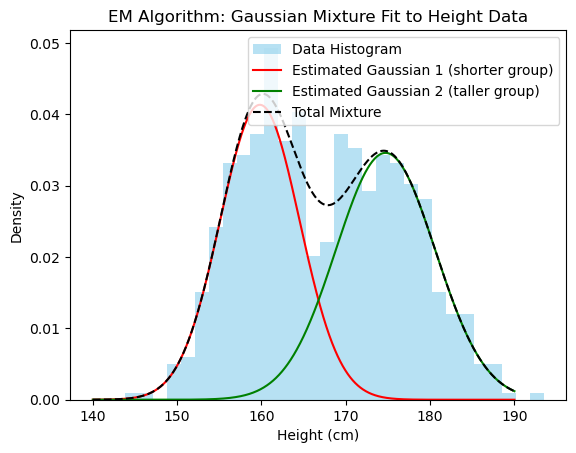

In [11]:
# Plot histogram again with estimated Gaussians
x = np.linspace(140, 190, 1000)
pdf1 = pi[0] * norm.pdf(x, mu[0], sigma[0])
pdf2 = pi[1] * norm.pdf(x, mu[1], sigma[1])

plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', label='Data Histogram')
plt.plot(x, pdf1, label='Estimated Gaussian 1 (shorter group)', color='red')
plt.plot(x, pdf2, label='Estimated Gaussian 2 (taller group)', color='green')
plt.plot(x, pdf1 + pdf2, label='Total Mixture', color='black', linestyle='--')
plt.title("EM Algorithm: Gaussian Mixture Fit to Height Data")
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.legend()
plt.show()

### 📈 Visualization of EM Algorithm on Height Data

This plot shows how the EM algorithm identified two distinct Gaussian distributions in the height dataset:

- 🔵 **Blue Histogram**: Actual data distribution (generated from two real groups).
- 🔴 **Red Curve**: EM's estimated Gaussian for Group 1 (shorter people).
- 🟢 **Green Curve**: EM's estimated Gaussian for Group 2 (taller people).
- ⚫ **Black Dashed Curve**: Total mixture of both groups (final model output).

✅ The estimated curves closely match the original data, showing that EM accurately discovered the hidden subgroups.
